In [1]:
!/gws/pw/j05/cop26_hackathons/bristol/install-kernel

Installed kernelspec cmip6 in /home/users/chebak/.local/share/jupyter/kernels/cmip6
Installed cmip6 Jupyter kernel for the hackathon


In [2]:
#import packages - works in CMIP6 notebook
from itertools import chain
from glob import glob
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm 
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from palettable.cmocean.sequential import Algae_20
from palettable.cmocean.diverging import Balance_20
import numpy as np
from matplotlib.colors import BoundaryNorm

# Set some plotting defaults
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

In [10]:
#read in ssp370 2015-2024
model='UKESM1'
path='/gws/pw/j05/cop26_hackathons/bristol/project03/output_nc/transeff_Omon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_*.nc'
dataset = xr.open_mfdataset(path)
#read in ssp370 2090-2099
#path2='/gws/pw/j05/cop26_hackathons/bristol/project03/output_nc/timeslice_fluxes_2090_2100expc_Omon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_*.nc'
#dataset2 = xr.open_mfdataset(path2)


In [11]:
dataset

<xarray.Dataset>
Dimensions:    (i: 360, j: 330, time: 86)
Coordinates:
  * time       (time) object 2015-12-30 00:00:00 ... 2100-12-30 00:00:00
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 322 323 324 325 326 327 328 329
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
    longitude  (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
Data variables:
    expc       (time, j, i) float32 dask.array<chunksize=(35, 330, 360), meta=np.ndarray>

In [12]:
#dataset2

In [13]:
#define function for a single spatial plot
def spatialplot(x, y, z, vmin, vmax, cbi, cblab, title, name): 
    
    # The following section interpolates from the weird grid to a regularly spaced lat lon grid.
    X = x.values.ravel()
    Y = y.values.ravel()
    Z = z.values.ravel()
    triangles = tri.Triangulation(X, Y)
    X_interp, Y_interp = np.meshgrid(np.linspace(-180, 180, 360), np.linspace(-90, 90, 330))
    interp_lin = tri.LinearTriInterpolator(triangles, Z)
    Z_interp = interp_lin(X_interp, Y_interp)


    #load land and create colorbar levels
    levls=np.arange(vmin,vmax,cbi)#arranging the colorbar levels

    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                            edgecolor='face',
                                            facecolor=cfeature.COLORS['land'])


    #Plotting
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide(central_longitude=0))#change the projection here
    
    cmap=Algae_20.mpl_colormap #change colormap here
    norm = BoundaryNorm(levls, ncolors=cmap.N, clip=True)#normalising the colorbar to the specified levels
    plot=plt.pcolormesh(X_interp,Y_interp,Z_interp,
                        transform=ccrs.PlateCarree(),
                        cmap=cmap,
                        norm=norm,
                        vmin=vmin,
                        vmax=vmax)
    ax.add_feature(land_10m,facecolor='gray')
    ax.coastlines(resolution='110m')
    cb=plt.colorbar(plot,shrink=0.6,extend='max')#shrink colorbar relative to figure size, extend top of the colorbar
    cb.ax.set_ylabel(cblab)#set colorbar label
    plt.title(title)
    plt.show()
    fig.savefig(name)

In [14]:
#load 2015-2024 mean transfer efficiency
expc=dataset['expc']
expc_15_24=expc.sel(time=slice("2015", "2024"))
print(expc_15_24.shape)
expc_15_24_mean=expc_15_24.mean(axis=0)

(10, 330, 360)


In [15]:
#load in data and undertake any calculations/ unit conversions
#x=lon, y=lat, z= 2D xarray variable, vmin=colorbar min value, vmax=colorbar maximum value, cbi=colorbar intervals, cblab=colorbar label, title=plot title
#x = dataset['lon']
#y = dataset['lat']

x=dataset['longitude']
y=dataset['latitude']
z = expc_15_24_mean
vmin=0
vmax=0.151
cbi=0.01
cblab='Transfer Efficiency'
title=model+' ssp370 - 2015-2024 Mean'
name="UKESM1_ssp370_teff_15_25_mean.jpg"


(330, 360)
(330, 360)


/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


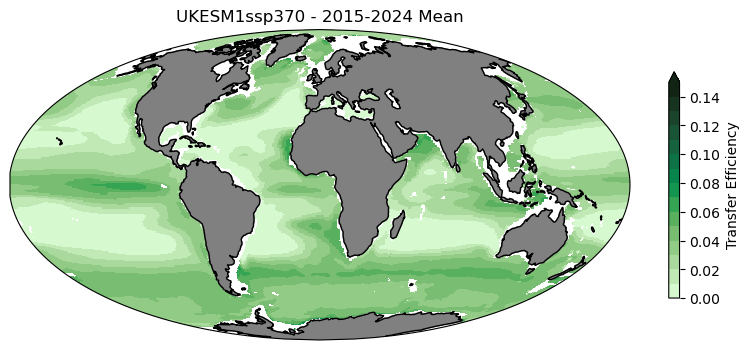

In [16]:
#run function
spatialplot(x,y,z,vmin,vmax,cbi,cblab,title,name)

In [17]:
#calculate 2090s mean transfer efficiency - ssp370
#expc_90s_mean=dataset2['expc']
expc_90s=expc.sel(time=slice("2090", "2099"))
print(expc_90s.shape)
expc_90s_mean=expc_90s.mean(axis=0)

(10, 330, 360)


In [20]:
#load in data and undertake any calculations/ unit conversions
#x=lon, y=lat, z= 2D xarray variable, vmin=colorbar min value, vmax=colorbar maximum value, cbi=colorbar intervals, cblab=colorbar label, title=plot title
x = dataset['longitude']
y = dataset['latitude']
z = expc_90s_mean
vmin=0
vmax=0.151
cbi=0.01
cblab='Transfer Efficiency'
title=model+' ssp370 2090-2099 Mean'
name="UKESM1_ssp370_teff_90s_mean.jpg"

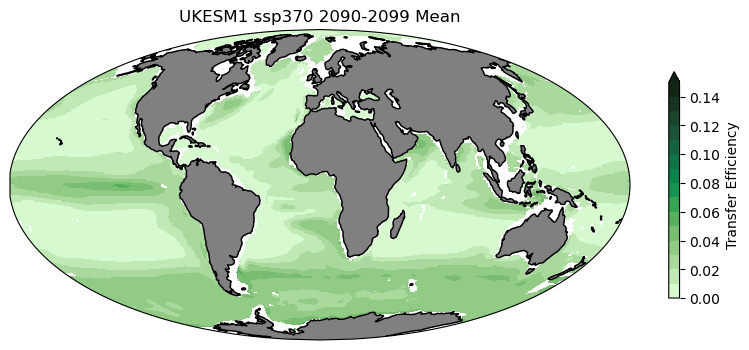

In [21]:
#run function
spatialplot(x,y,z,vmin,vmax,cbi,cblab,title,name)

In [22]:
#define function for a single spatial plot - difference
def spatialdiff(x, y, z, vmin, vmax, cbi, cblab, title, name): 
    
    # The following section interpolates from the weird grid to a regularly spaced lat lon grid.
    X = x.values.ravel()
    Y = y.values.ravel()
    Z = z.values.ravel()
    triangles = tri.Triangulation(X, Y)
    X_interp, Y_interp = np.meshgrid(np.linspace(-180, 180, 360), np.linspace(-90, 90, 330))
    interp_lin = tri.LinearTriInterpolator(triangles, Z)
    Z_interp = interp_lin(X_interp, Y_interp)


    #load land and create colorbar levels
    levls=np.arange(vmin,vmax,cbi)#arranging the colorbar levels

    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                            edgecolor='face',
                                            facecolor=cfeature.COLORS['land'])


    #Plotting
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide(central_longitude=0))#change the projection here
    
    cmap=Balance_20.mpl_colormap #change colormap here
    norm = BoundaryNorm(levls, ncolors=cmap.N, clip=True)#normalising the colorbar to the specified levels
    plot=plt.pcolormesh(X_interp,Y_interp,Z_interp,
                        transform=ccrs.PlateCarree(),
                        cmap=cmap,
                        norm=norm,
                        vmin=vmin,
                        vmax=vmax)
    ax.add_feature(land_10m,facecolor='gray')
    ax.coastlines(resolution='110m')
    cb=plt.colorbar(plot,shrink=0.6,extend='both')#shrink colorbar relative to figure size, extend top of the colorbar
    cb.ax.set_ylabel(cblab)#set colorbar label
    plt.title(title)
    plt.show()
    fig.savefig(name)

In [23]:
#calculate difference in transfer efficiency between the 2015-2024 and 2090s 
expcdiff=expc_90s_mean-expc_15_24_mean


In [24]:
#load in data and undertake any calculations/ unit conversions
#x=lon, y=lat, z= 2D xarray variable, vmin=colorbar min value, vmax=colorbar maximum value, cbi=colorbar intervals, cblab=colorbar label, title=plot title
x = dataset['longitude']
y = dataset['latitude']
z = expcdiff
vmin=-0.06
vmax=0.07
cbi=0.005
cblab='Transfer Efficiency'
title=model+' -ssp370 - 2090s-2015s Difference'
name="UKESM1_ssp370_teff_15_24_90s_diff.jpg"

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


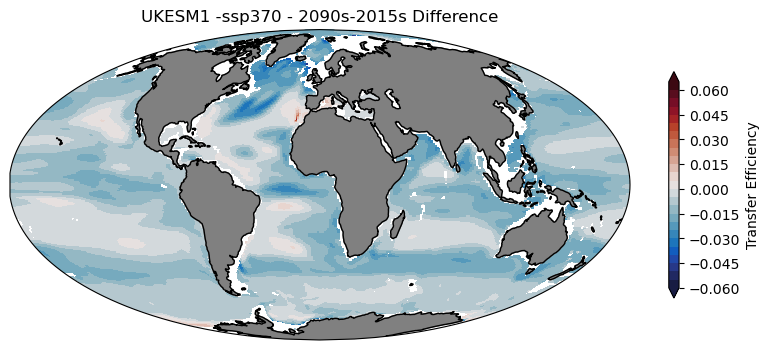

In [25]:
#run function
spatialdiff(x,y,z,vmin,vmax,cbi,cblab,title,name)
